In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Imports**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/7 types of images",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 6994 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/drive/MyDrive/7 types of images",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )


Found 6994 images belonging to 7 classes.


In [ ]:
# Working with pre trained model

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from keras.callbacks import EarlyStopping

# early stopping
es = EarlyStopping(
    monitor='val_accuracy',  # watch validation accuracy
    min_delta=0.01,          # must improve by at least 1%
    patience=5,              # wait 5 epochs before stopping
    verbose=1,
    mode='auto'
)

# put callback in a list
call_back = [es]


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(
    train_data,
    epochs=30,
    validation_data=val_data,
    callbacks=[es]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1381s 6s/step - accuracy: 0.3617 - loss: 8.0876 - val_accuracy: 0.5685 - val_loss: 4.4088
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 136s 622ms/step - accuracy: 0.5637 - loss: 4.4707 - val_accuracy: 0.6347 - val_loss: 3.9962
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 117s 535ms/step - accuracy: 0.5961 - loss: 4.4803 - val_accuracy: 0.6817 - val_loss: 3.4613
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 116s 529ms/step - accuracy: 0.6643 - loss: 3.8232 - val_accuracy: 0.6541 - val_loss: 4.8062
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 136s 621ms/step - accuracy: 0.6776 - loss: 3.7173 - val_accuracy: 0.7259 - val_loss: 3.0559
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 135s 619ms/step - accuracy: 0.6939 - loss: 3.5050 - val_accuracy: 0.7475 - val_loss: 2.7513
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 116s 530ms/step - accuracy: 0.7146 - loss: 3.5973 - val_accuracy: 0.7914 - val_loss: 2.1565
Epoch 8/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 148s 557ms/step - accuracy: 0.7540 - l

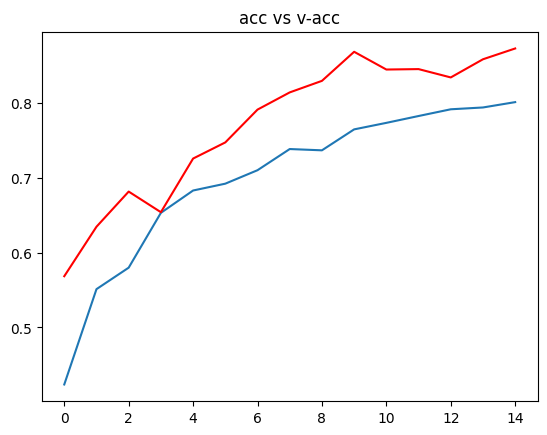

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

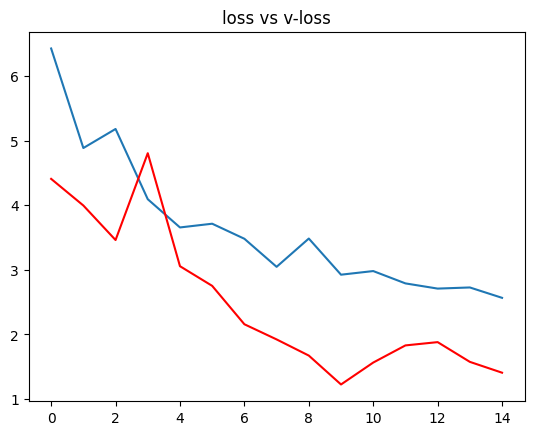

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()